### Q: What aspects of a listing predict the price? In other words if I have a listing what can I do to increase my chances of renting at a higher price? 

First, let's read in the data and necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mypy import print_side_by_side
from mypy import display_side_by_side
%matplotlib inline

In [76]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# b_cal = pd.read_csv('boston_calendar.csv')
# s_cal = pd.read_csv('seatle_calendar.csv')
# b_list = pd.read_csv('boston_listings.csv')
# s_list = pd.read_csv('seatle_listings.csv')
# b_rev = pd.read_csv('boston_reviews.csv')
# s_rev = pd.read_csv('seatle_reviews.csv')

# b_cal_1 = pd.read_csv('b_cal_1.csv', index_col = 0)
# s_cal_1 = pd.read_csv('s_cal_1.csv', index_col = 0)
# b_list_d= pd.read_csv('b_list_d.csv', index_col = 0)
# s_list_d= pd.read_csv('s_list_d.csv', index_col = 0)
b_list_d = pd.read_csv('b_list_d.csv', index_col = 0, parse_dates = ['host_since','first_review','last_review'], date_parser= pd.to_datetime)
s_list_d = pd.read_csv('s_list_d.csv', index_col = 0, parse_dates  = ['host_since','first_review','last_review'], date_parser= pd.to_datetime)

 _______________________________________________________________________________________________________________________

### Task2: Data Understanding

let's take a look at price 

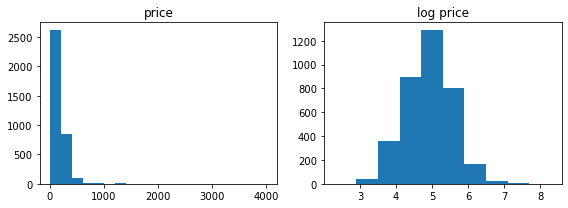

In [182]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.hist(b_list_d['price'], bins = 20)
plt.title('price')
plt.subplot(1,2,2)
plt.hist(np.log(b_list_d['price']))
plt.title('log price')
plt.tight_layout();

let's create a DataFrame with log price 

In [185]:
b_price = b_list_d.copy()
b_price['log_price'] = np.log(b_price['price'])
s_price = s_list_d.copy()
s_price['log_price'] = np.log(s_price['price'])

Check How amenities correlate with price 

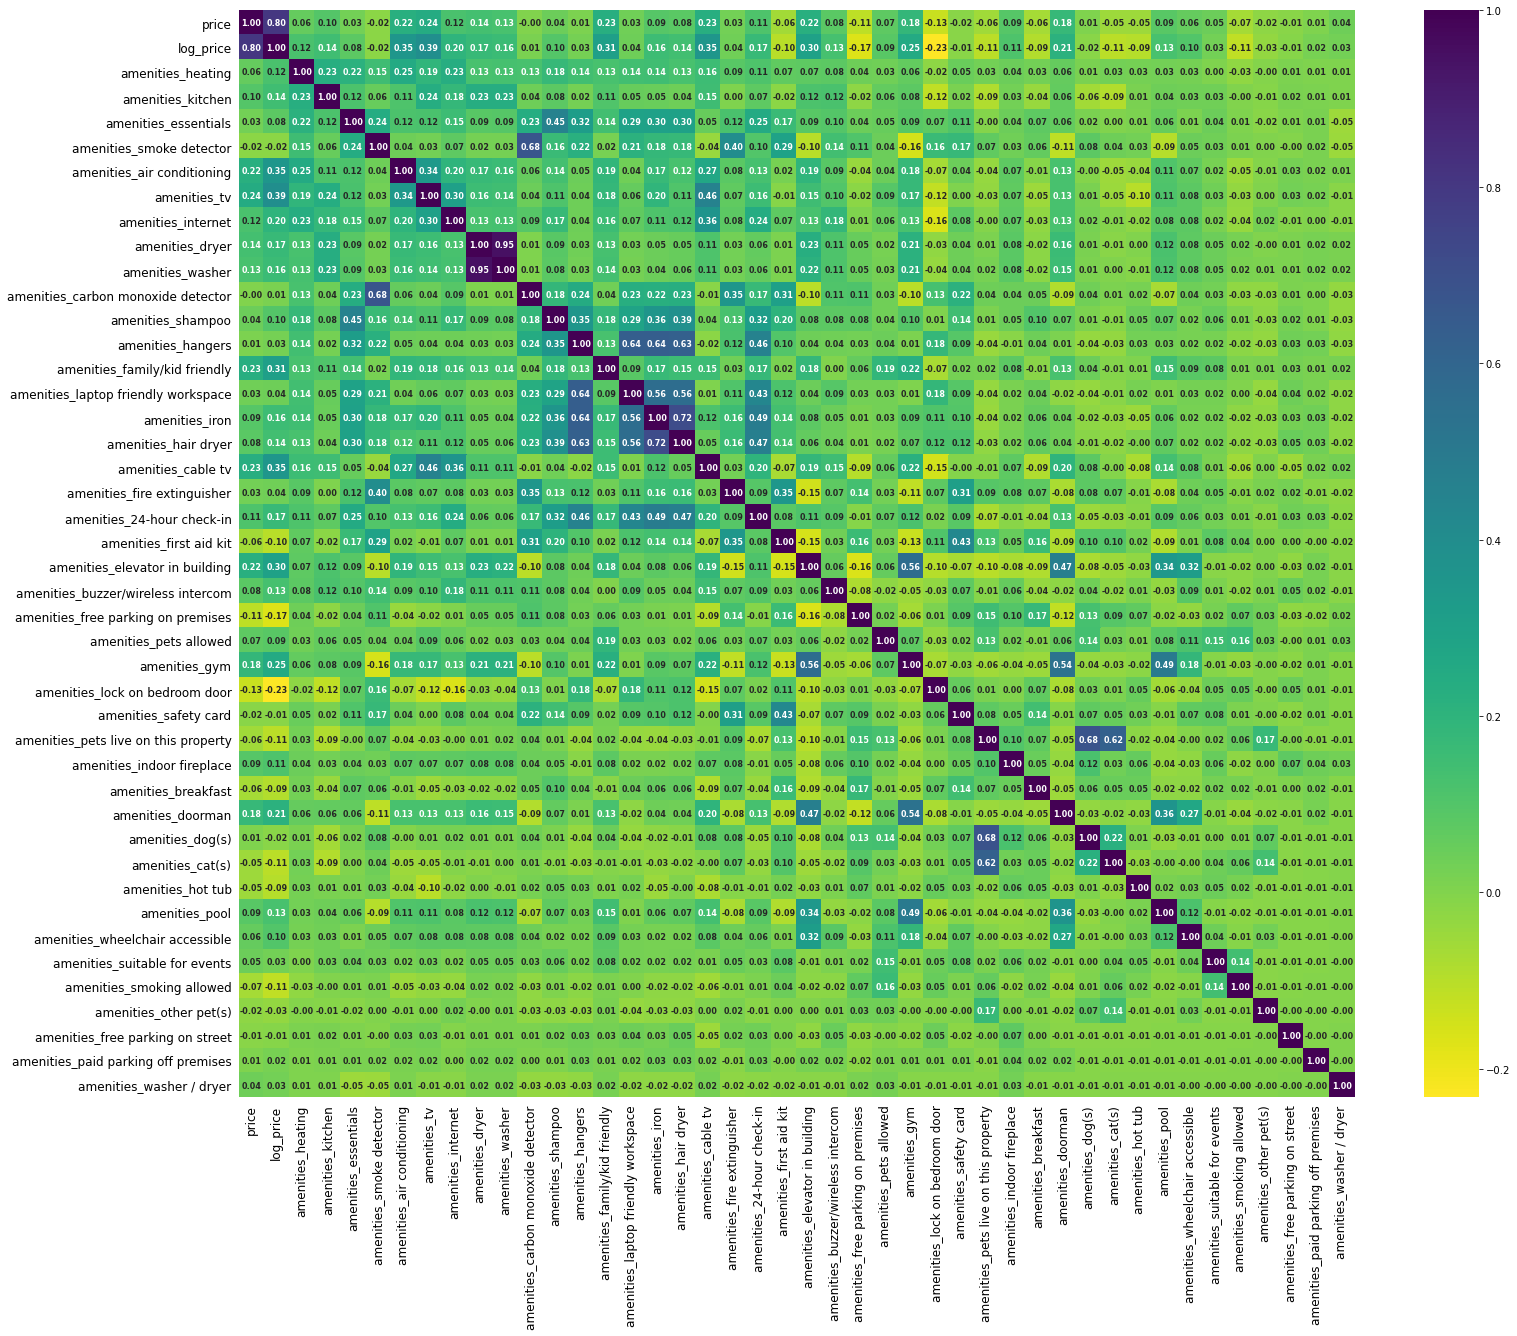

In [192]:
cols2= [col for col in b_price.columns if 'amenities' in str(col)]
cols2[0]='price'
cols2[1]='log_price'
plt.figure(figsize = (25,20))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
p = sns.heatmap(b_price[cols2].corr(),annot_kws = {'fontsize':8, 'fontweight': 'bold'},cmap = 'viridis_r', annot = True, fmt = '.2f');
p.tick_params(left=False, bottom=False)

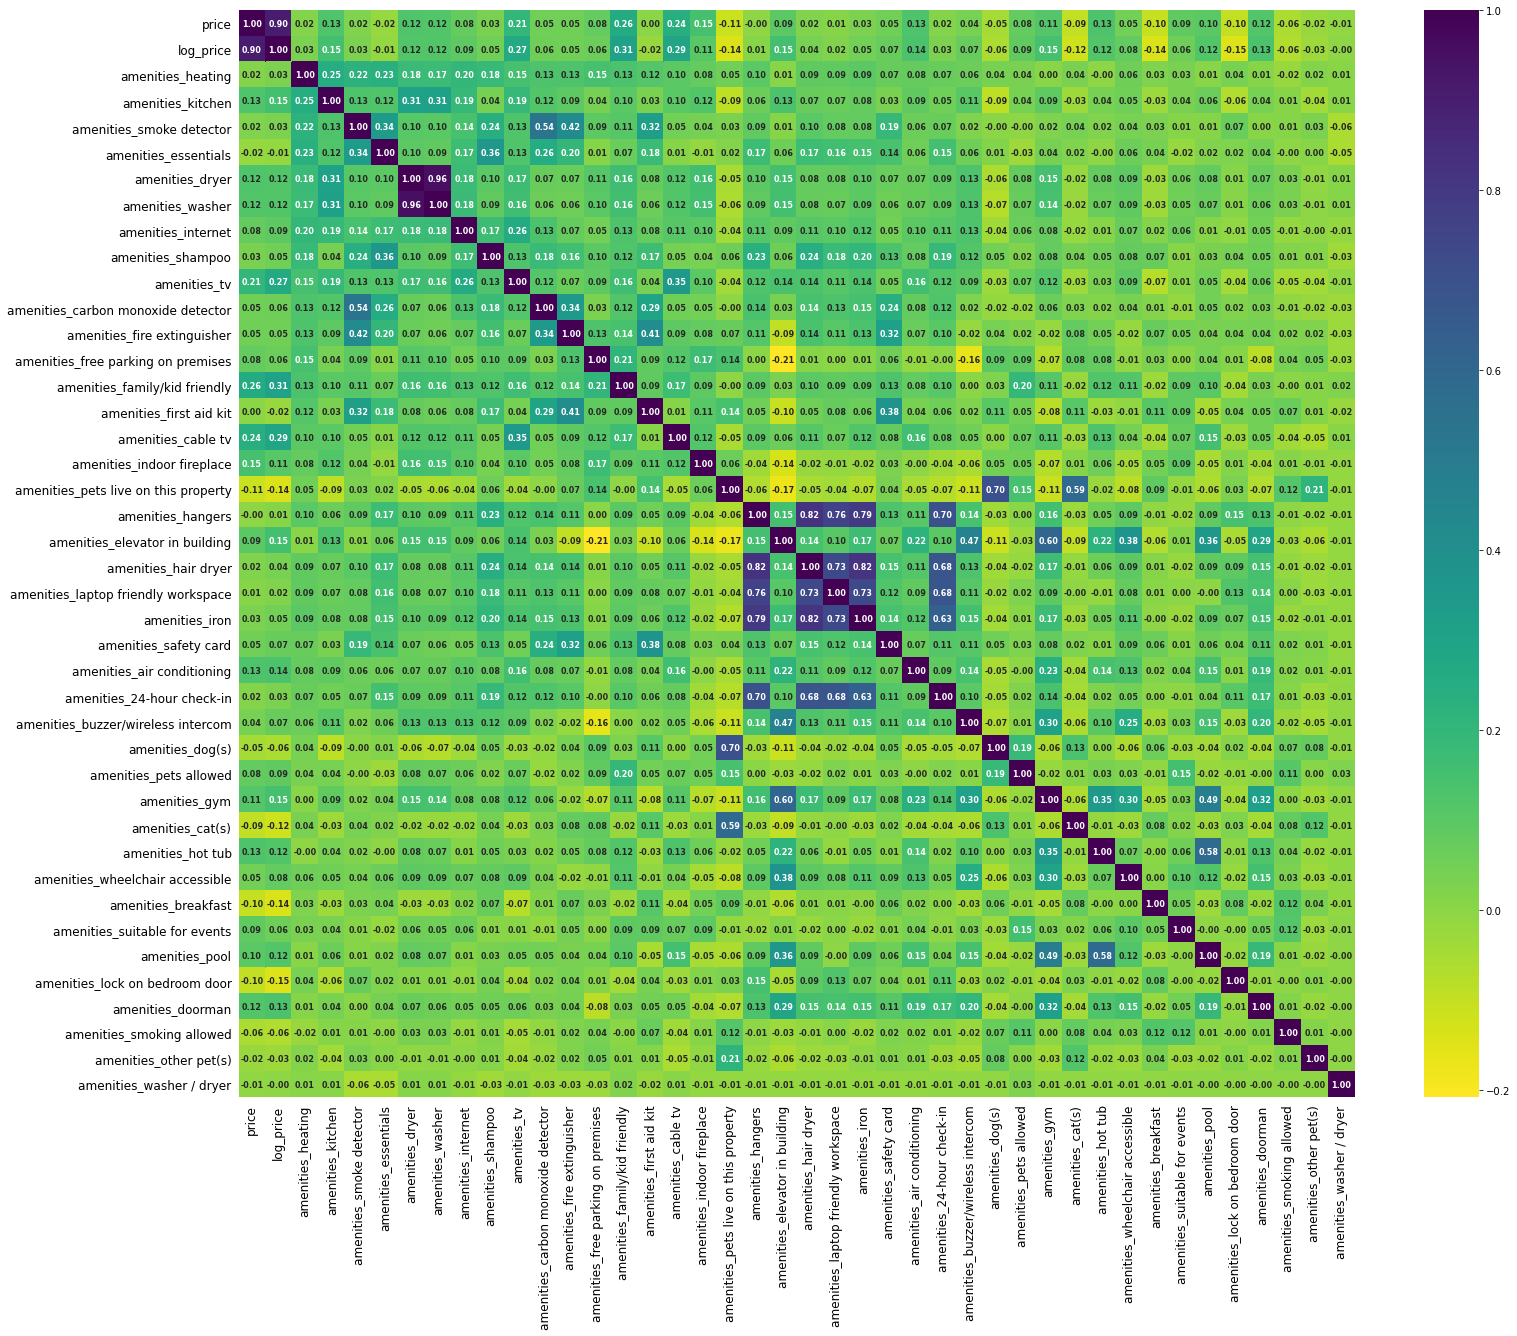

In [193]:
cols2= [col for col in s_price.columns if 'amenities' in str(col)]
cols2[0]='price'
cols2[1]='log_price'
plt.figure(figsize = (25,20))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
p = sns.heatmap(s_price[cols2].corr(),annot_kws = {'fontsize':8, 'fontweight': 'bold'},cmap = 'viridis_r', annot = True, fmt = '.2f');
p.tick_params(left=False, bottom=False)

Check How host_verifications correlate with price 

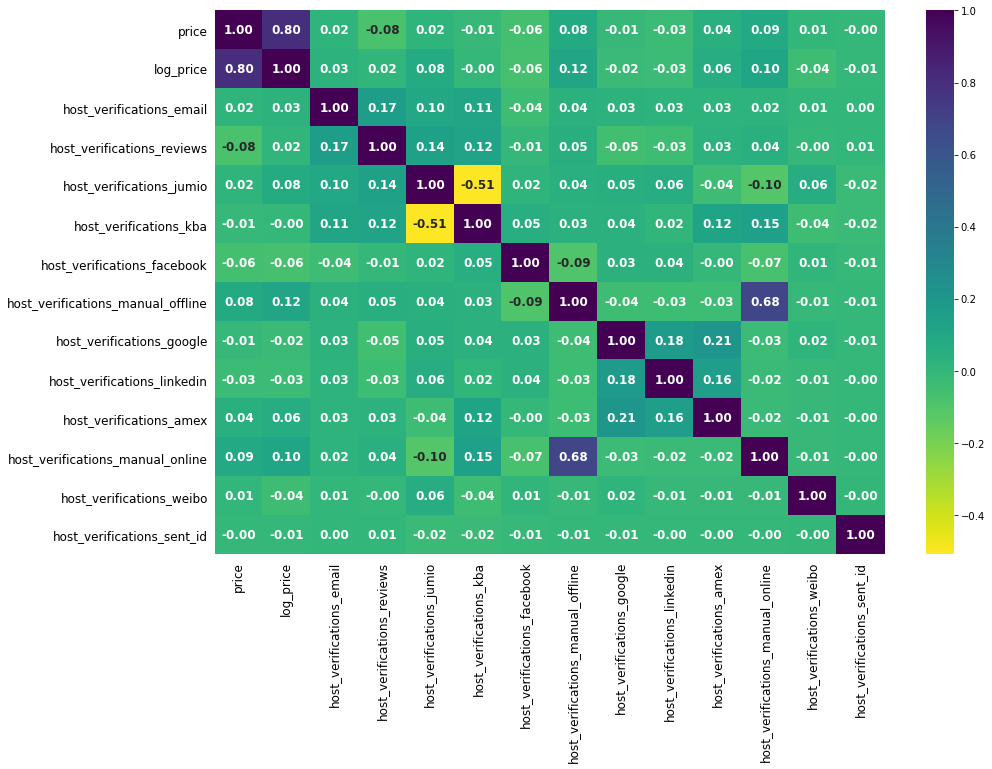

In [197]:
cols3= [col for col in b_price.columns if 'host_verifications' in str(col)]
cols3[0]= 'price'
cols3[1]= 'log_price'
plt.figure(figsize = (15,10))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
p = sns.heatmap(b_price[cols3].corr(),annot_kws = {'fontsize':12, 'fontweight': 'bold'},cmap = 'viridis_r', annot = True, fmt = '.2f')
p.tick_params(left=False, bottom=False)

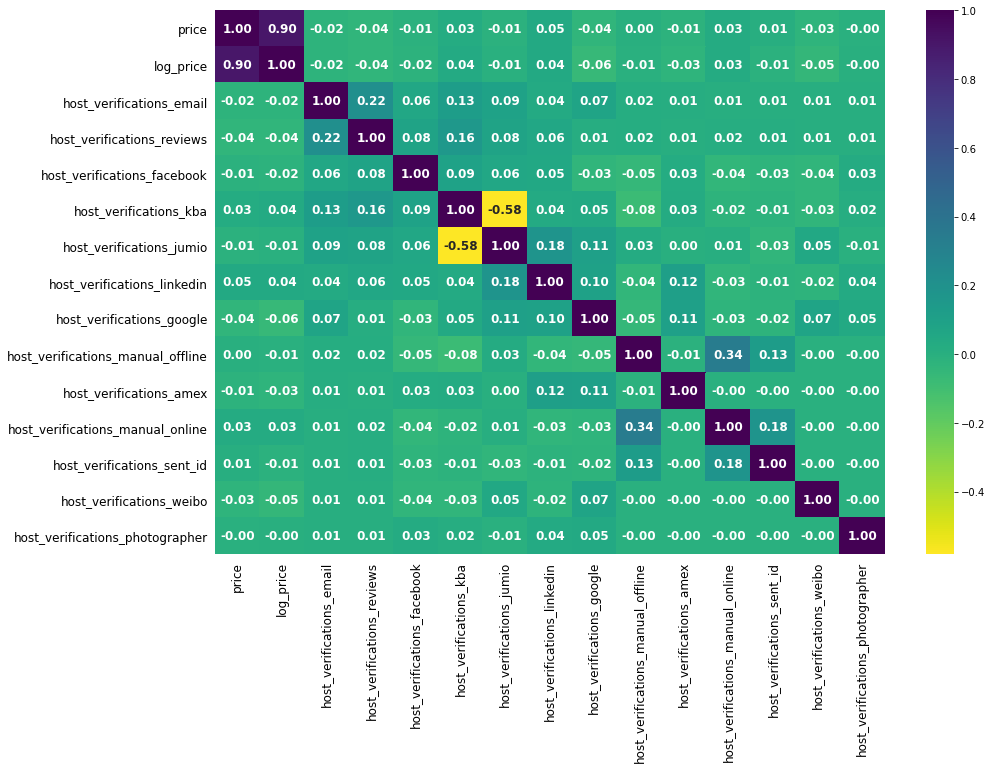

In [196]:
cols3= [col for col in s_price.columns if 'host_verifications' in str(col)]
cols3[0]= 'price'
cols3[1]='log_price'
plt.figure(figsize = (15,10))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
p = sns.heatmap(s_price[cols3].corr(),annot_kws = {'fontsize':12, 'fontweight': 'bold'},cmap = 'viridis_r', annot = True, fmt = '.2f')
p.tick_params(left=False, bottom=False)

check how the rest of the numerical columns correlate with price

In [200]:
cols1 = ['price','log_price','host_response_rate', 'host_acceptance_rate', 'host_is_superhost','host_listings_count', 
'host_has_profile_pic', 'host_identity_verified','is_location_exact', 'accommodates', 'bathrooms', 'bedrooms', 
'beds','cleaning_fee', 'guests_included', 'extra_people','minimum_nights', 'availability_30', 'availability_60',
'availability_90', 'availability_365', 'number_of_reviews','review_scores_rating', 'review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location',
'review_scores_value', 'instant_bookable','require_guest_profile_picture', 'require_guest_phone_verification',
'calculated_host_listings_count', 'reviews_per_month', 'len_name','len_host_about', 'len_summary', 'len_description',
'len_neighborhood_overview', 'len_transit', 'count_amenities','count_host_verifications']

Wall time: 2.15 s


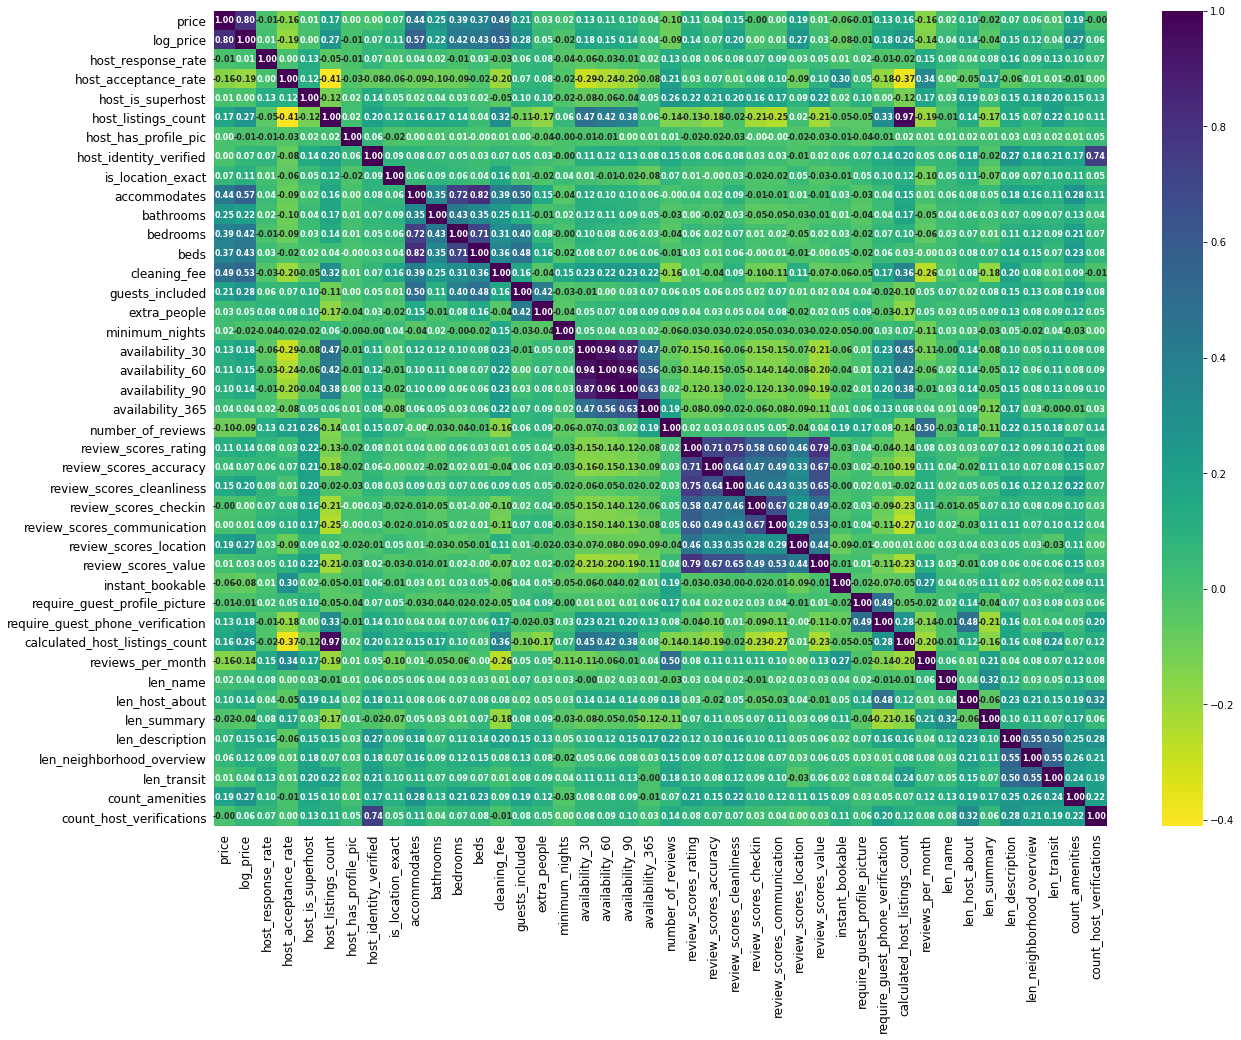

In [201]:
%%time
plt.figure(figsize = (20,15))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
p = sns.heatmap(b_price[cols1].corr(),annot_kws = {'fontsize':8, 'fontweight': 'bold'},cmap = 'viridis_r', annot = True, fmt = '.2f');
p.tick_params(left=False, bottom=False)

Wall time: 1.7 s


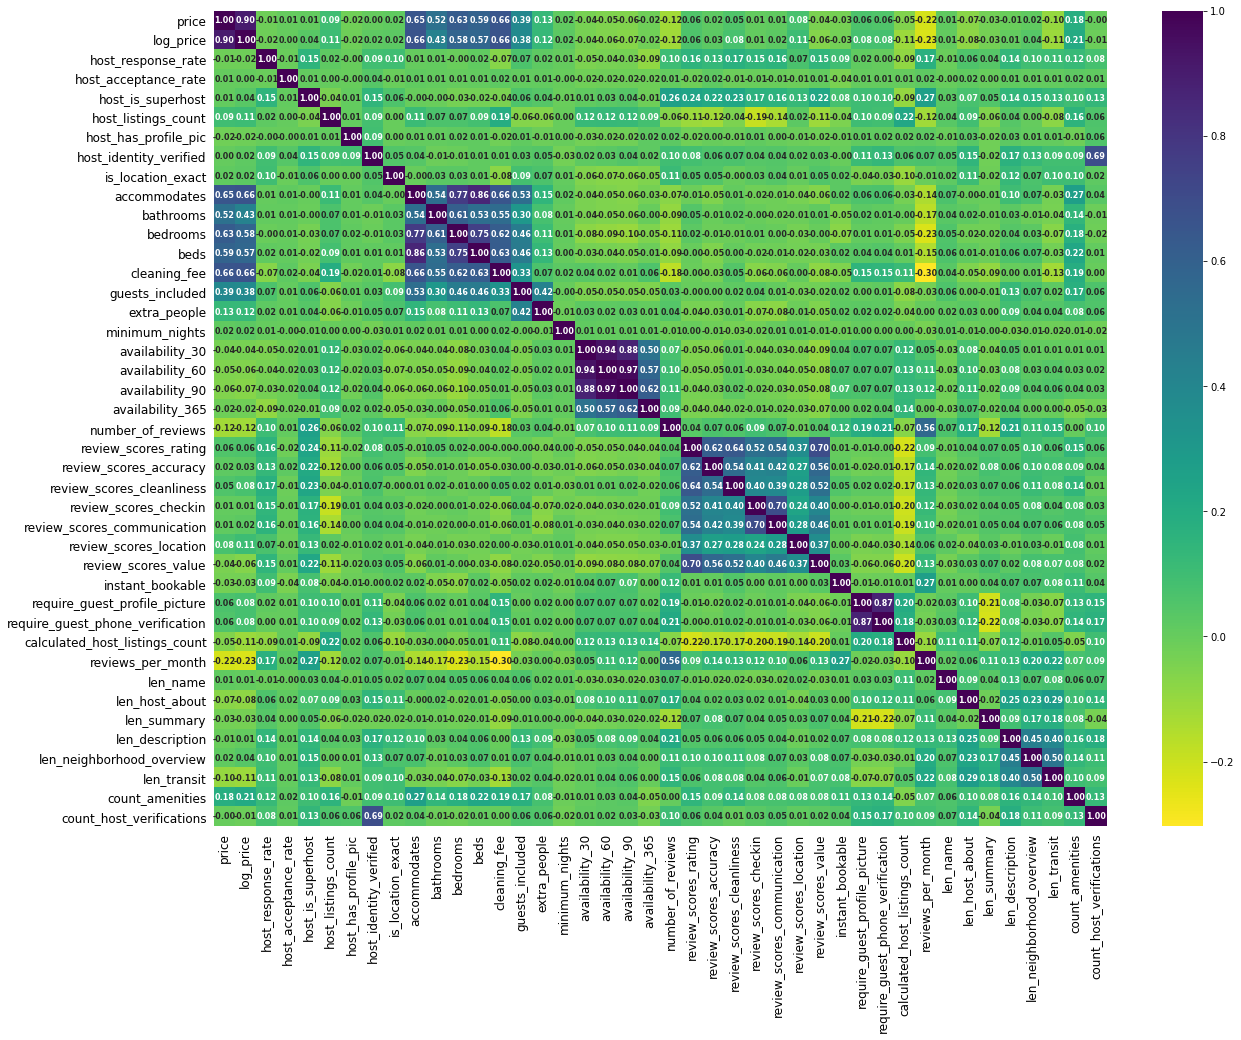

In [202]:
%%time
plt.figure(figsize = (20,15))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
p = sns.heatmap(s_price[cols1].corr(),annot_kws = {'fontsize':8, 'fontweight': 'bold'},cmap = 'viridis_r', annot = True, fmt = '.2f');
p.tick_params(left=False, bottom=False)

Seems like `accomodates`, `bathrooms`, `beds`, `cleaning fee`, `guests_included` correlates well with price, we can also add `extra people`, `reviews_per_month`, `count_amenities`, `revies_scores_location`, `len_host_about`, `calculated_host_listings_count`, `amenities_air conditioning`, `amenities_tv`, `amenities_family/kid friendly`, `amenities_elevator in building`, `amenities_gym`,`amenities_doorman`.

Wall time: 549 ms


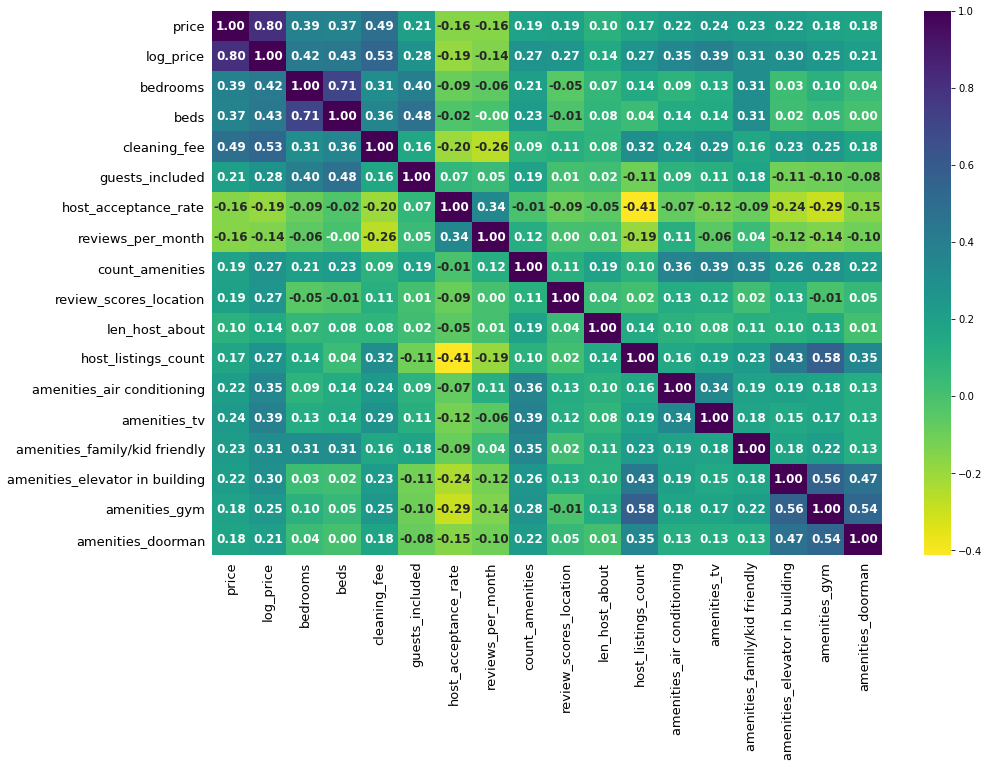

In [203]:
%%time
plt.figure(figsize = (15,10))
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
p = sns.heatmap(b_price[['price','log_price','bedrooms','beds','cleaning_fee','guests_included','host_acceptance_rate',
'reviews_per_month', 'count_amenities', 'review_scores_location', 'len_host_about', 'host_listings_count',
'amenities_air conditioning','amenities_tv','amenities_family/kid friendly','amenities_elevator in building', 
'amenities_gym','amenities_doorman']].corr(),annot_kws = {'fontsize':12, 'fontweight': 'bold'},cmap = 'viridis_r', annot = True, fmt = '.2f');
p.tick_params(left=False, bottom=False);

Wall time: 538 ms


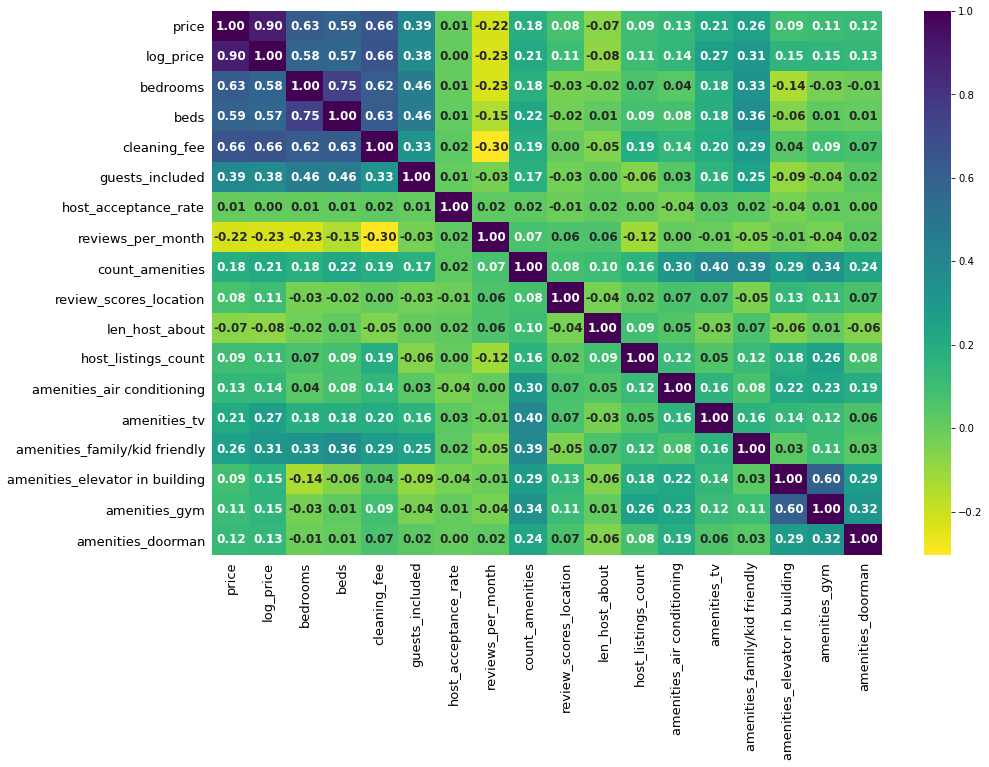

In [204]:
%%time
plt.figure(figsize = (15,10))
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
p = sns.heatmap(s_price[['price','log_price','bedrooms','beds','cleaning_fee','guests_included','host_acceptance_rate',
'reviews_per_month', 'count_amenities', 'review_scores_location', 'len_host_about', 'host_listings_count',
'amenities_air conditioning','amenities_tv','amenities_family/kid friendly','amenities_elevator in building', 
'amenities_gym','amenities_doorman']].corr(),annot_kws = {'fontsize':12, 'fontweight': 'bold'},cmap = 'viridis_r', annot = True, fmt = '.2f');
p.tick_params(left=False, bottom=False)


let's take a look at the scatter plots with log_price and price ( exclude variables with only binary values)

Wall time: 18.3 s


<Figure size 1440x1440 with 0 Axes>

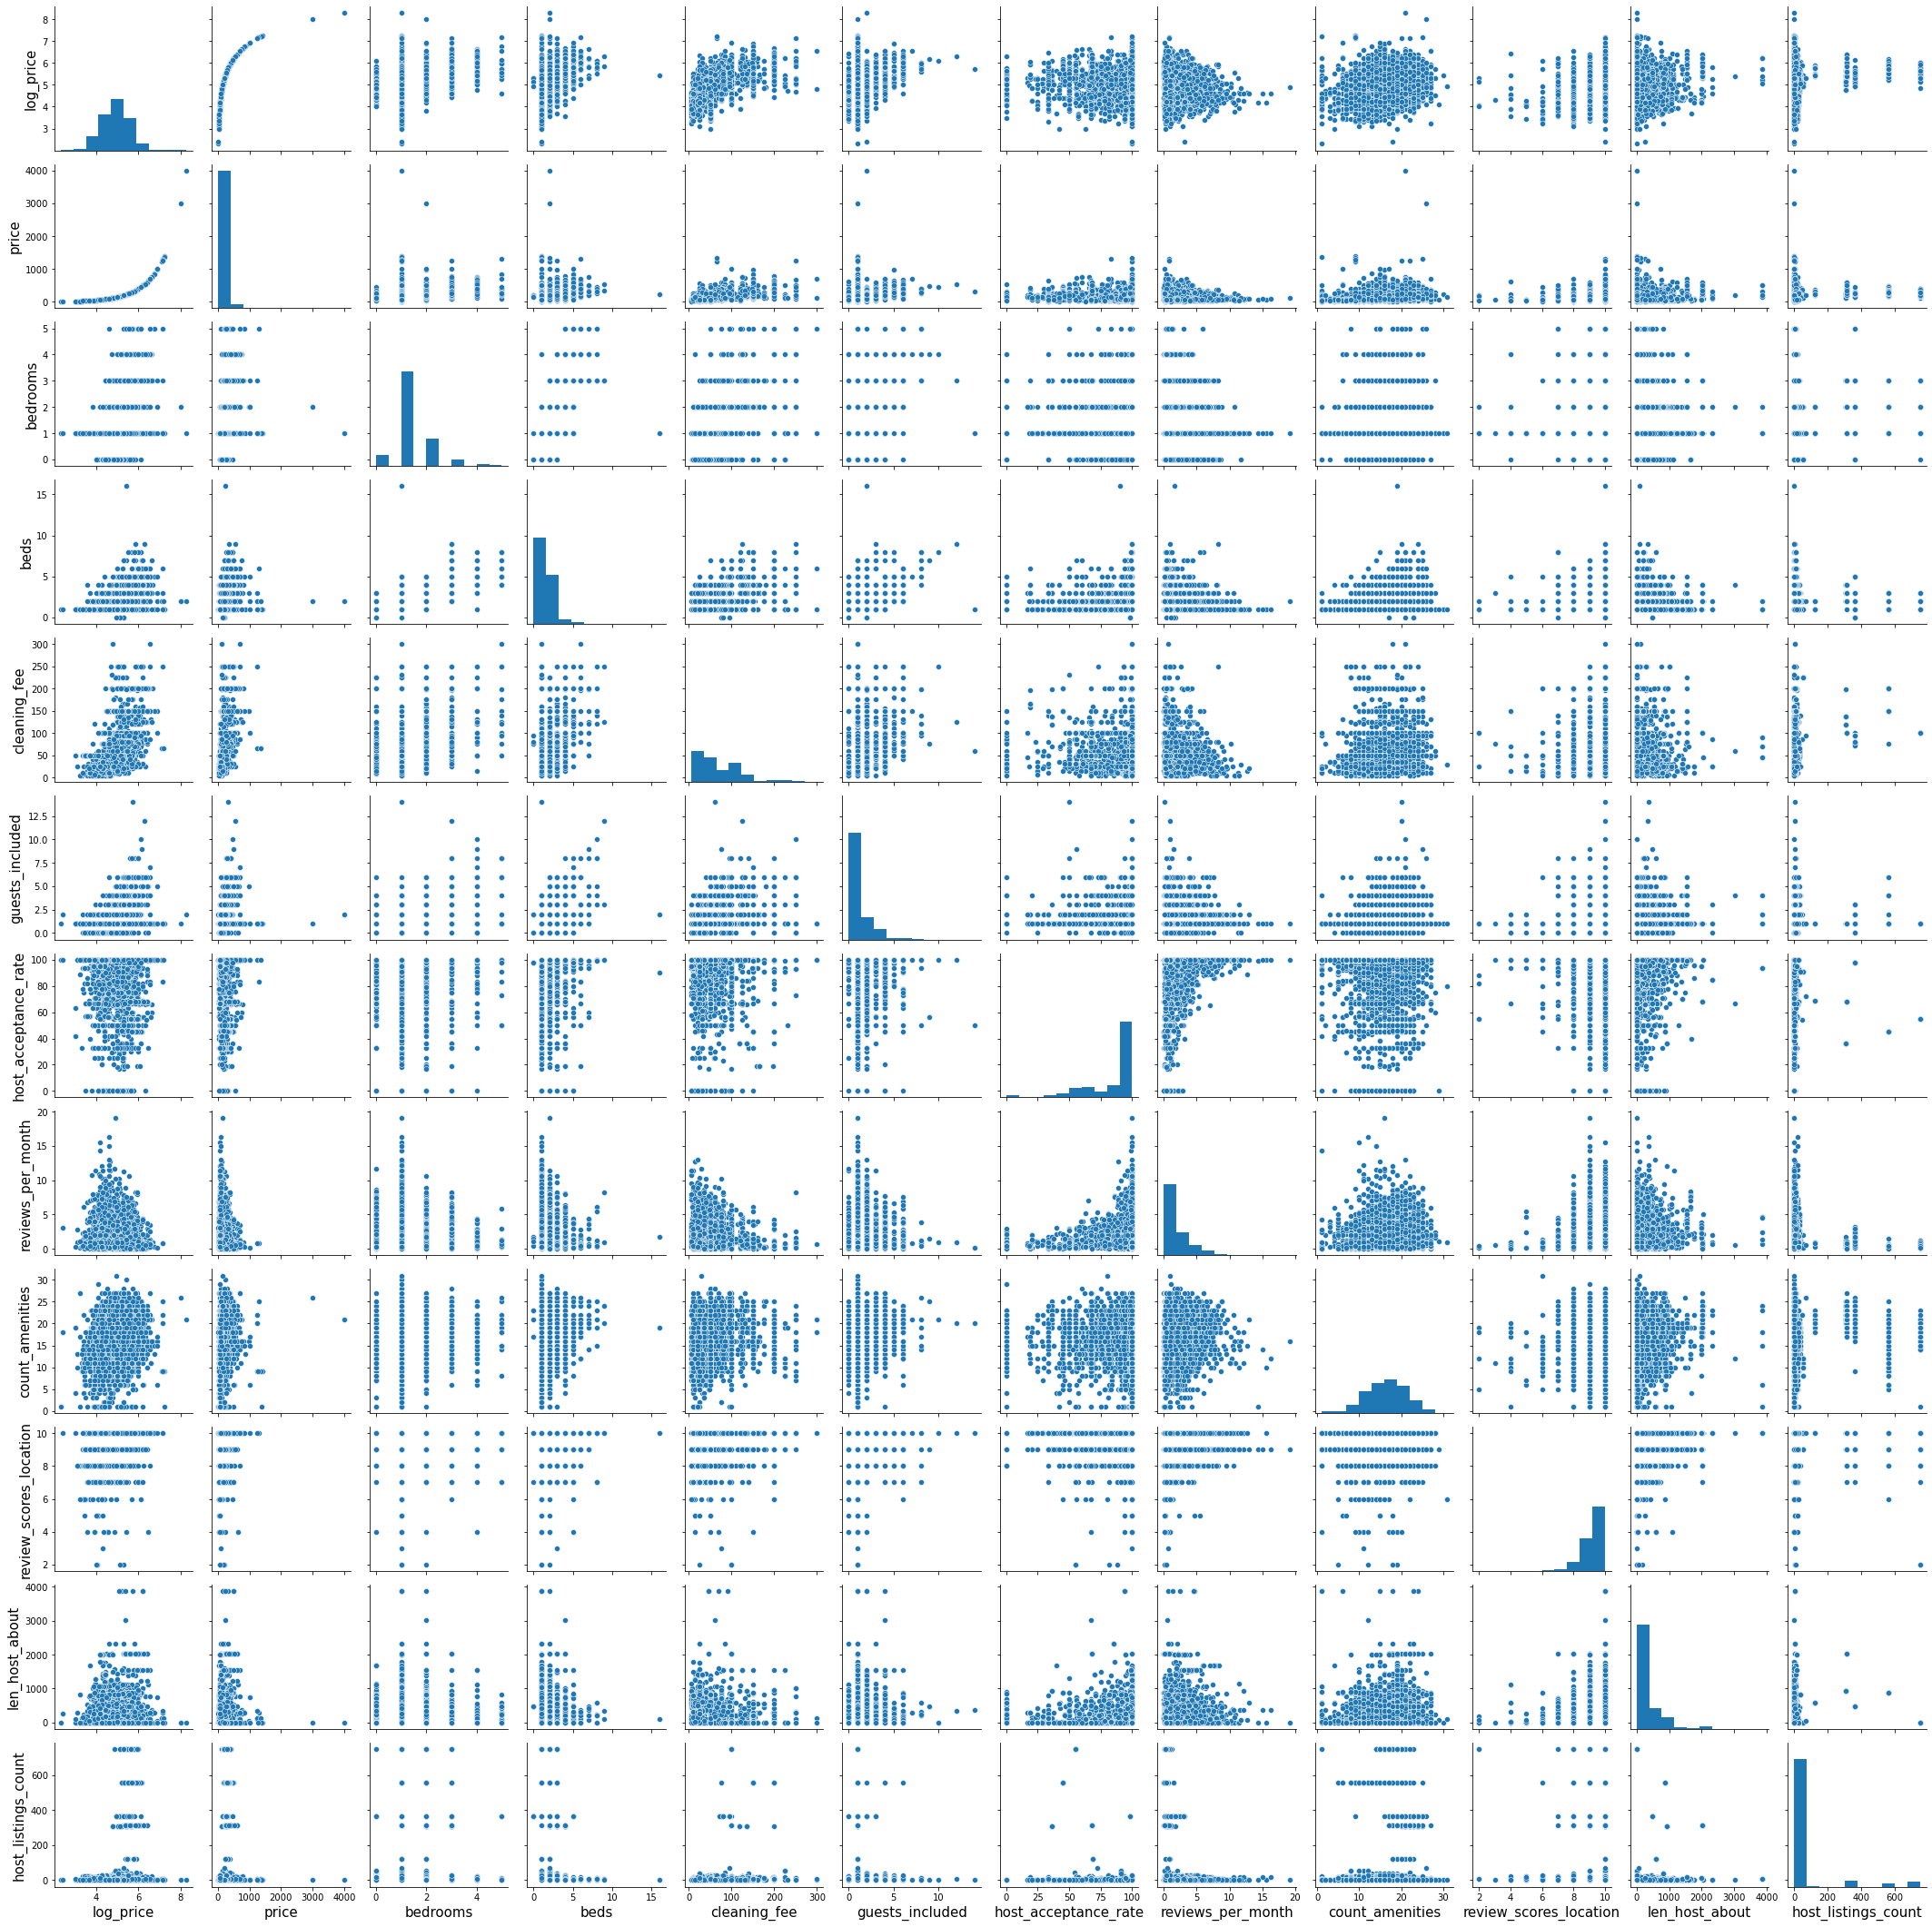

In [198]:
%%time
plt.figure(figsize =(20,20))
g = sns.PairGrid(data =b_price, vars = ['log_price', 'price','bedrooms','beds','cleaning_fee','guests_included','host_acceptance_rate',
'reviews_per_month', 'count_amenities', 'review_scores_location', 'len_host_about', 
'host_listings_count']); #corner = True
g.map_offdiag(sns.scatterplot);
g.map_diag(plt.hist);

for ax in plt.gcf().axes:
    l = ax.get_ylabel()
    ax.set_ylabel(l, fontsize=15)
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)

Wall time: 19.9 s


<Figure size 1440x1440 with 0 Axes>

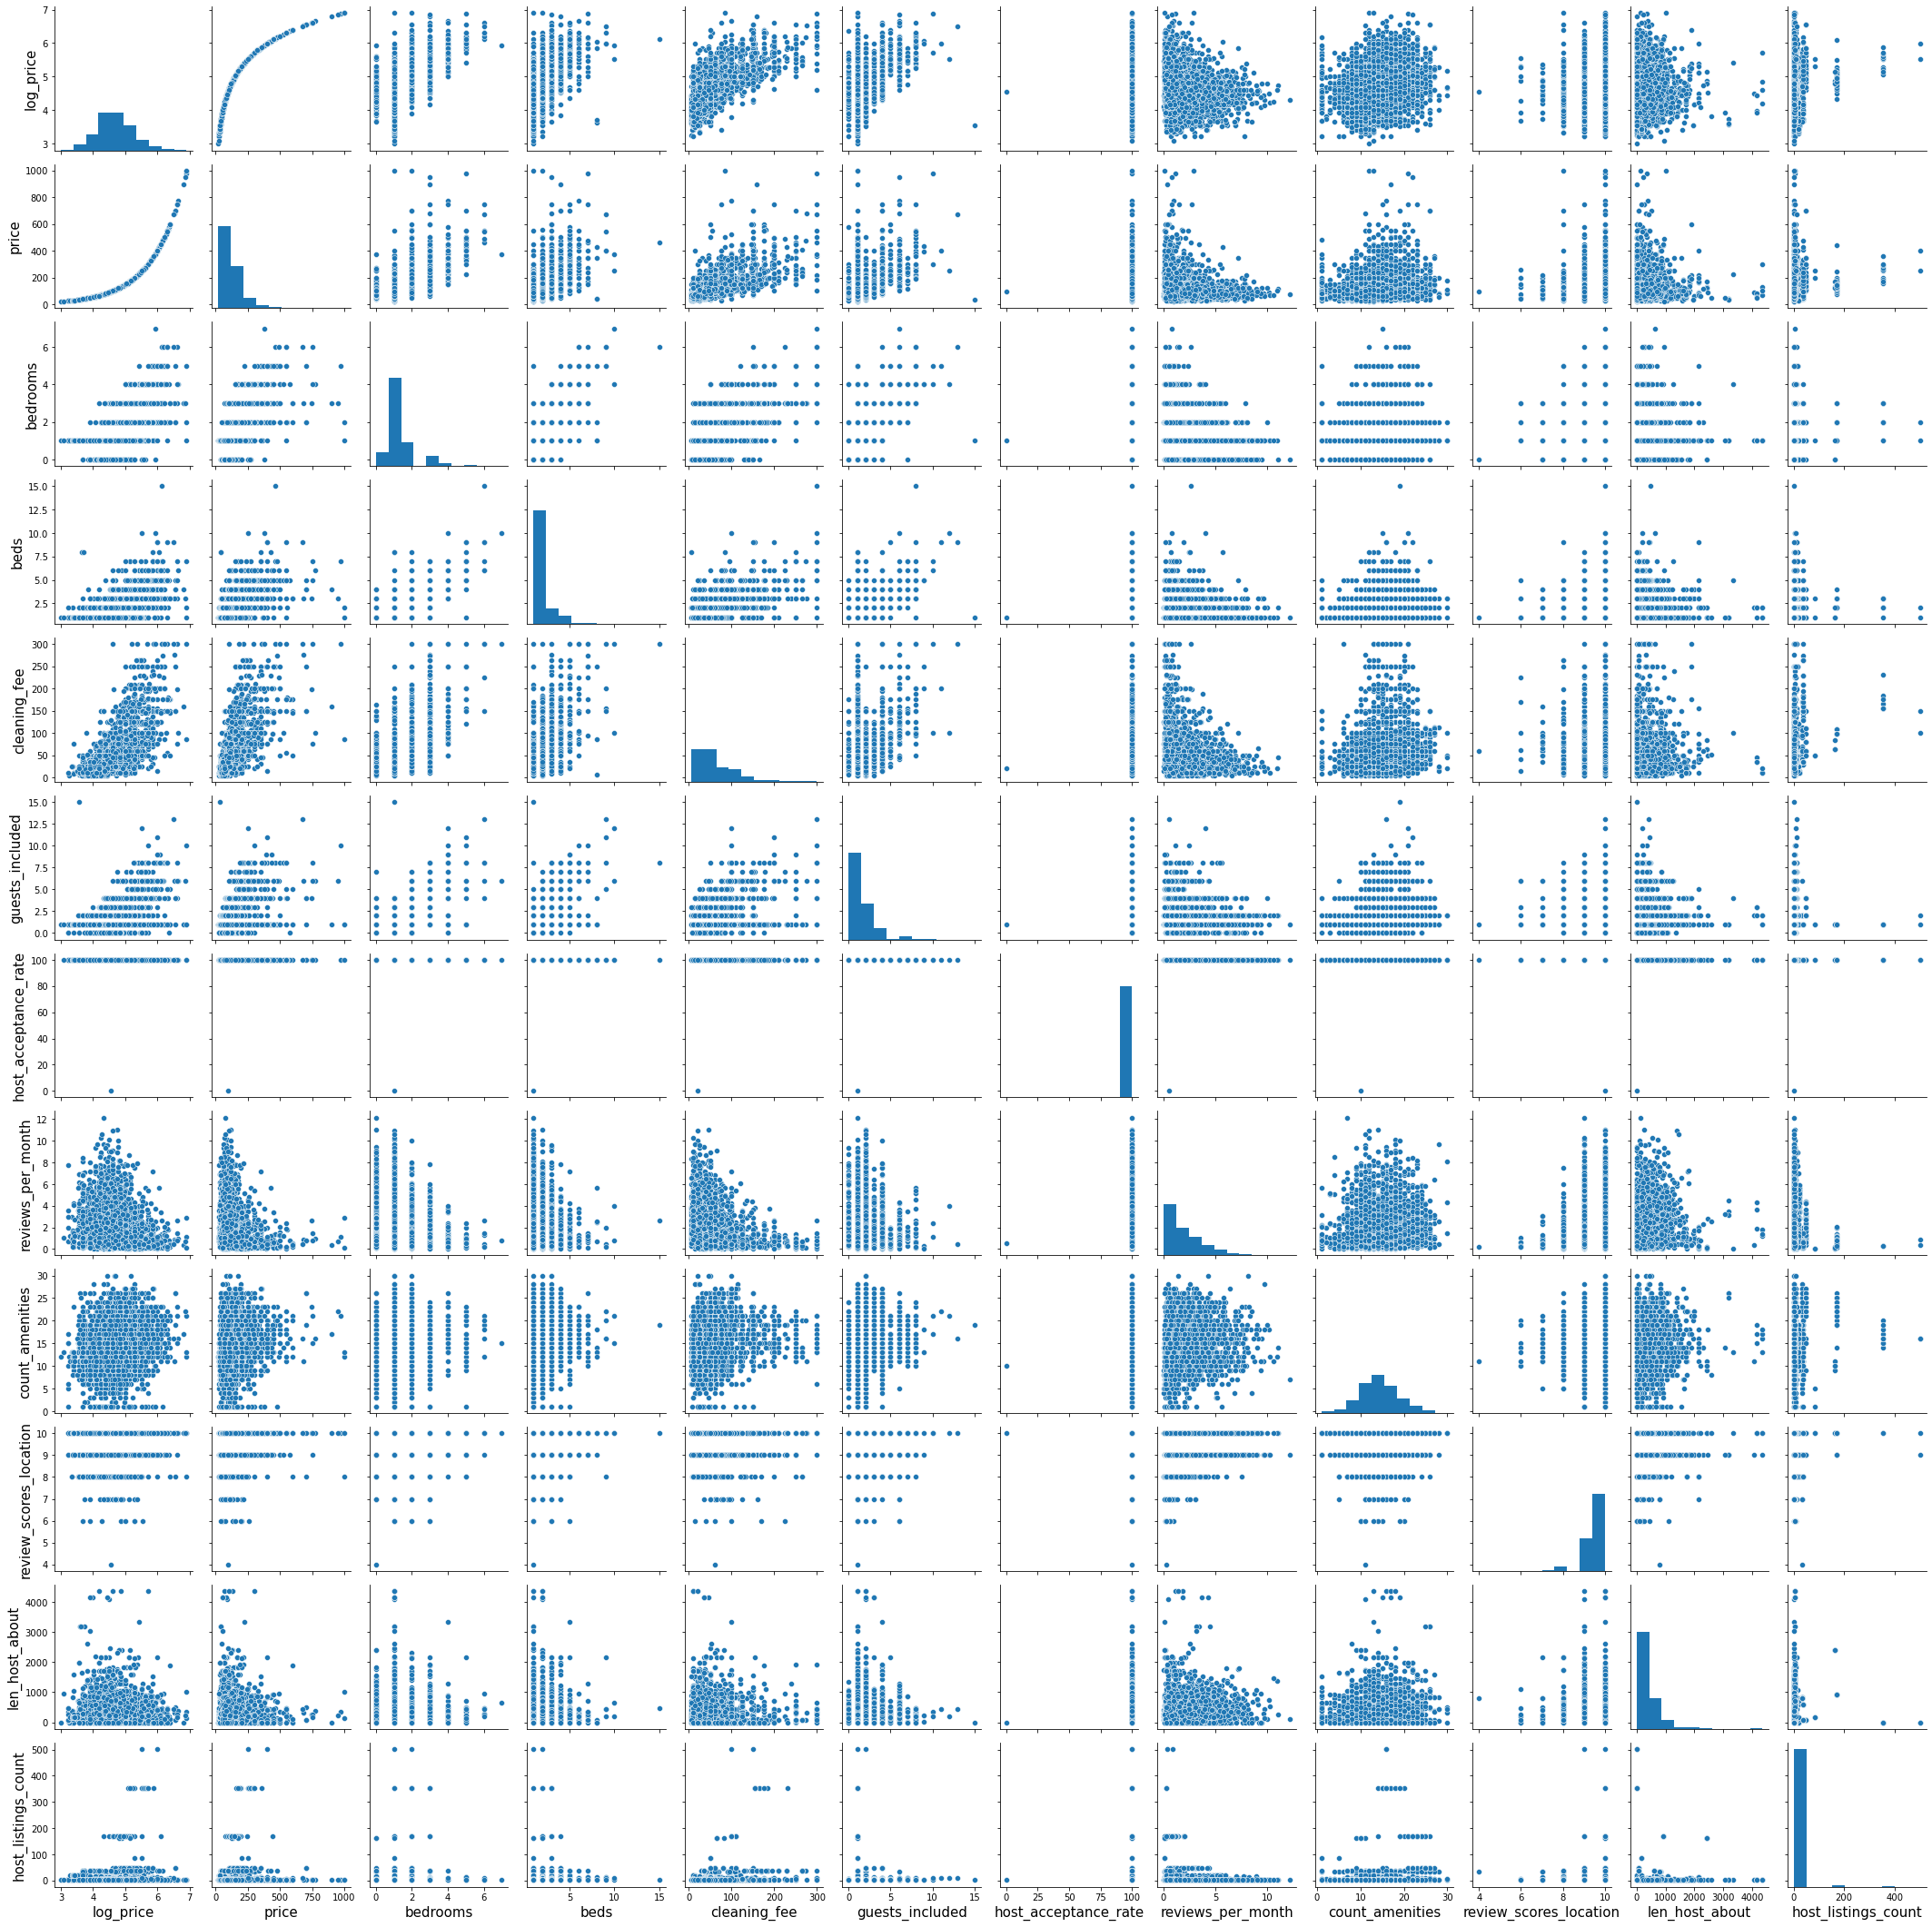

In [205]:
%%time
plt.figure(figsize =(20,20))
g = sns.PairGrid(data =s_price, vars = ['log_price', 'price','bedrooms','beds','cleaning_fee','guests_included','host_acceptance_rate',
'reviews_per_month', 'count_amenities', 'review_scores_location', 'len_host_about', 'host_listings_count']); #corner = True
g.map_offdiag(sns.scatterplot)
g.map_diag(plt.hist)

for ax in plt.gcf().axes:
    l = ax.get_ylabel()
    ax.set_ylabel(l, fontsize=15)
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=15)

In [290]:
# print(b_cal_1[(b_cal_1['listing_id']==14933461    )& (b_cal_1['available']=='t')]['price'].count())
# print(b_cal_1[(b_cal_1['listing_id']==14933461    )& (b_cal_1['available']=='t')]['price'].unique())